<a href="https://colab.research.google.com/github/harshdungrani/TSF-GRIP-Jan-2021-Data-Science-and-Business-Analytics/blob/main/Task_EDA_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HARSH DUNGRANI**
#**TSF GRIP Jan'2021**
#**Data Science & Business Analytics**
#**TASK: Exploratory Data Analysis - Retail**


In [5]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Import dataset ‘SampleSuperstore’
data = pd.read_csv('/content/SampleSuperstore.csv')

In [36]:
#Top 5 rows
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
#Bottom 5 rows
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
#Correlation between the different parameters in the dataset
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


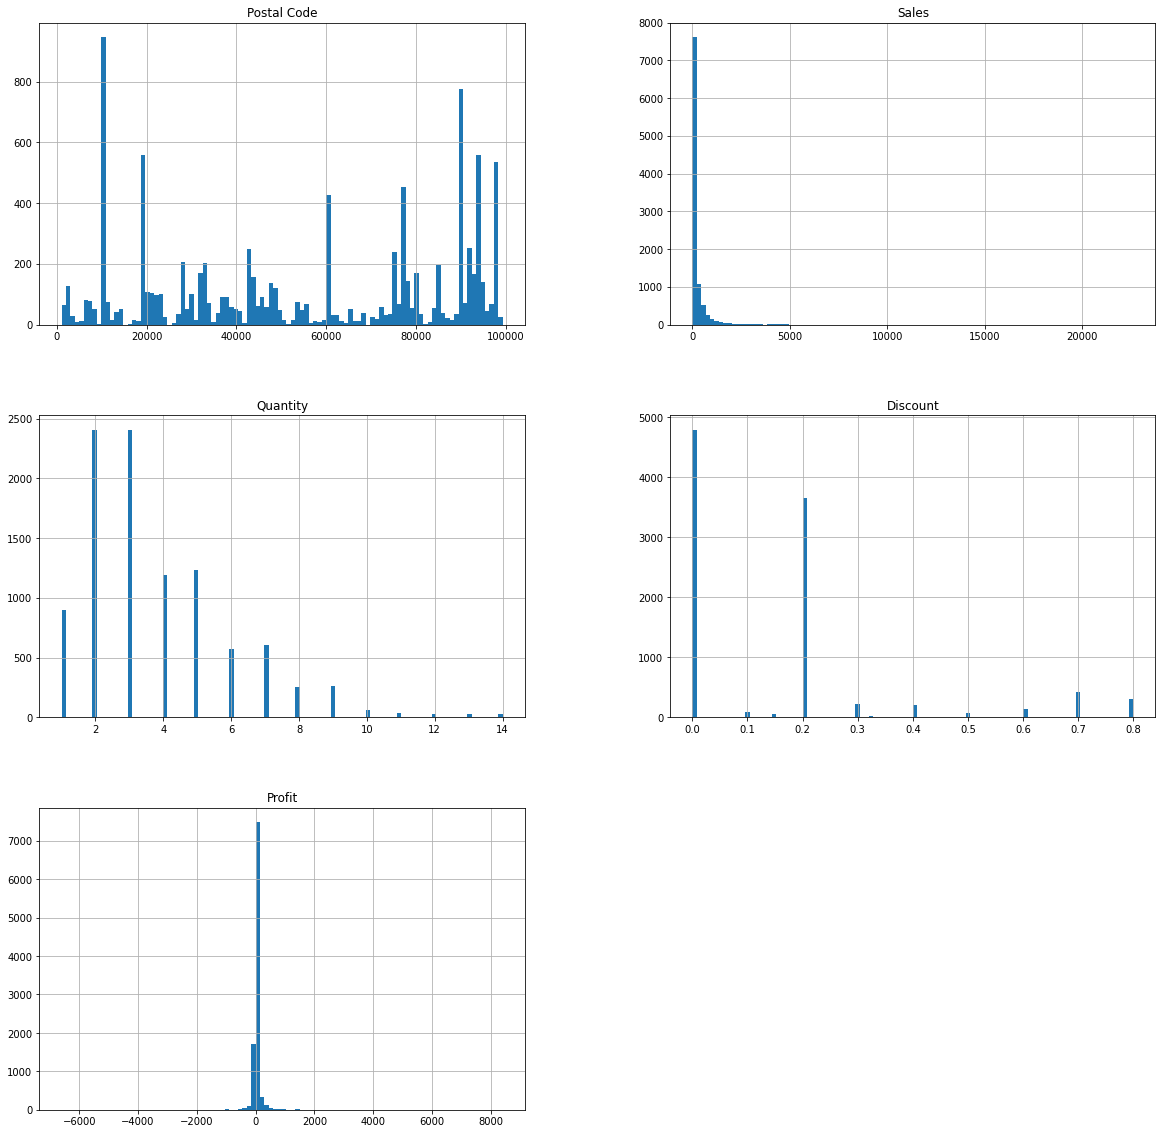

In [17]:
#Histogram plot
data.hist(bins=100 ,figsize=(20,20))
plt.show();

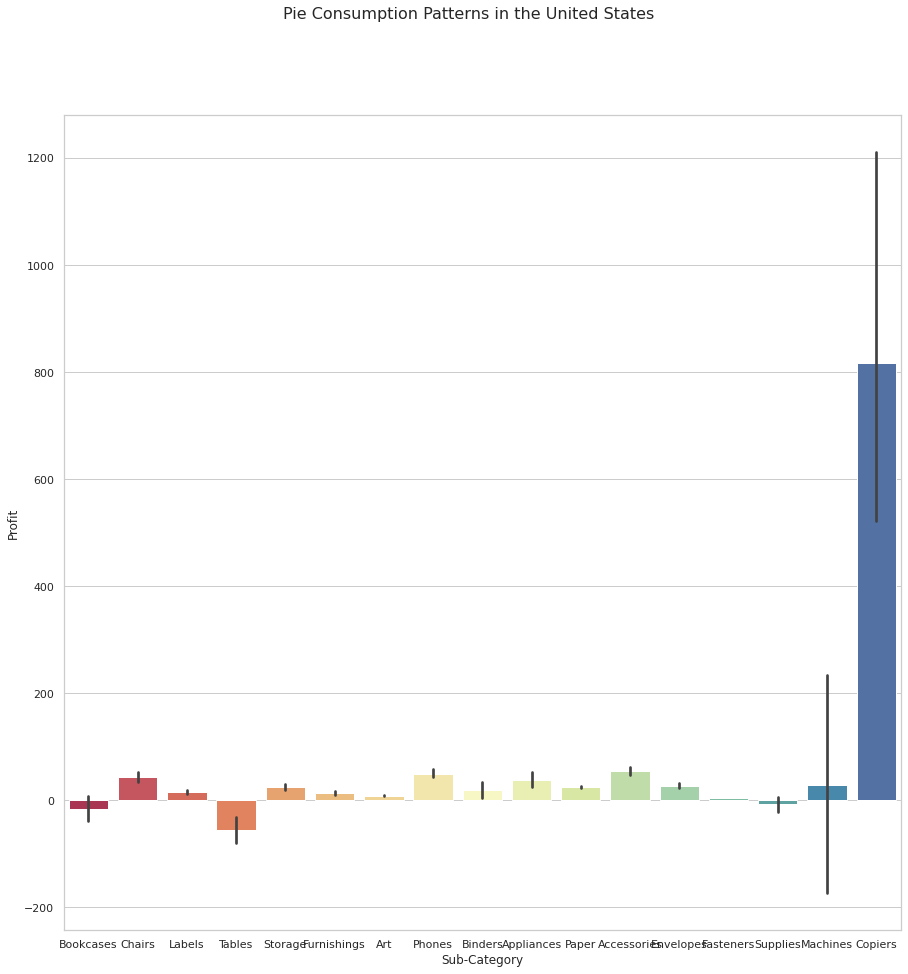

In [21]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(15,15))

sns.barplot(x='Sub-Category',y='Profit', data=data, palette='Spectral')

plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)
plt.show()

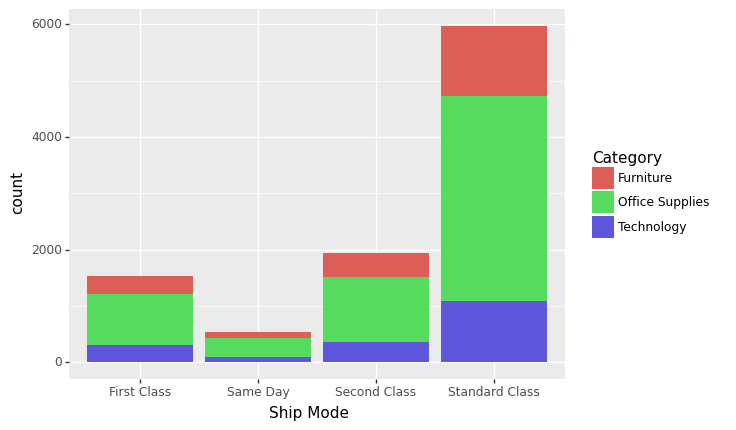

<ggplot: (-9223363243032090701)>

In [23]:
ggplot(data, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

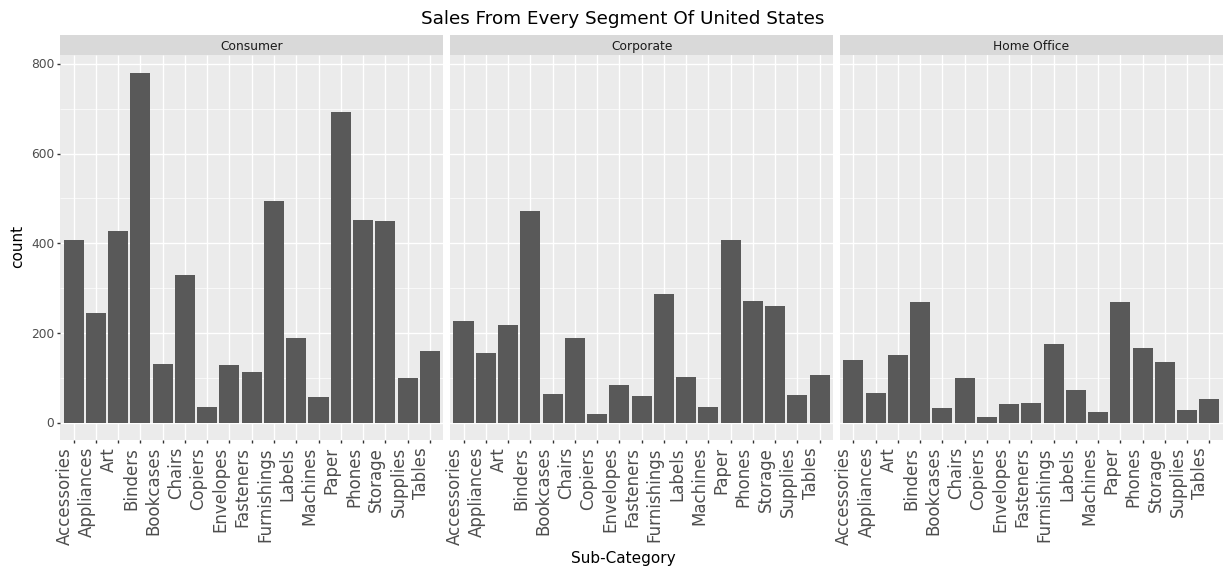

<ggplot: (-9223363243031811198)>

In [30]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(15,5),axis_ticks_length_major=2,axis_ticks_length_minor=2)
(ggplot(data, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States"))

#From the graph above, we can conclude that for "Consumer" the sub-category "Binders" has the highest sale while "Copiers" has the lowest sale. This is true for both "Corporate" and "Home Office".

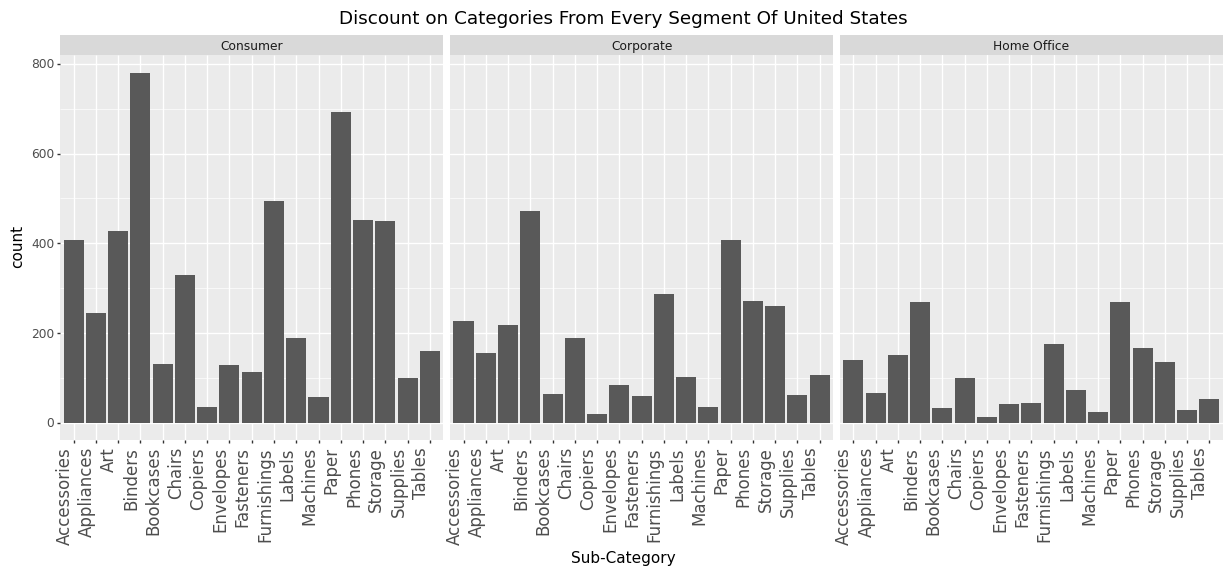

<ggplot: (-9223363243031182939)>

In [31]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(15,5),axis_ticks_length_major=2,axis_ticks_length_minor=2)
(ggplot(data, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States"))

#From the graph above, we can see that the discount on sub-categories follow a similar trend to it's sales.

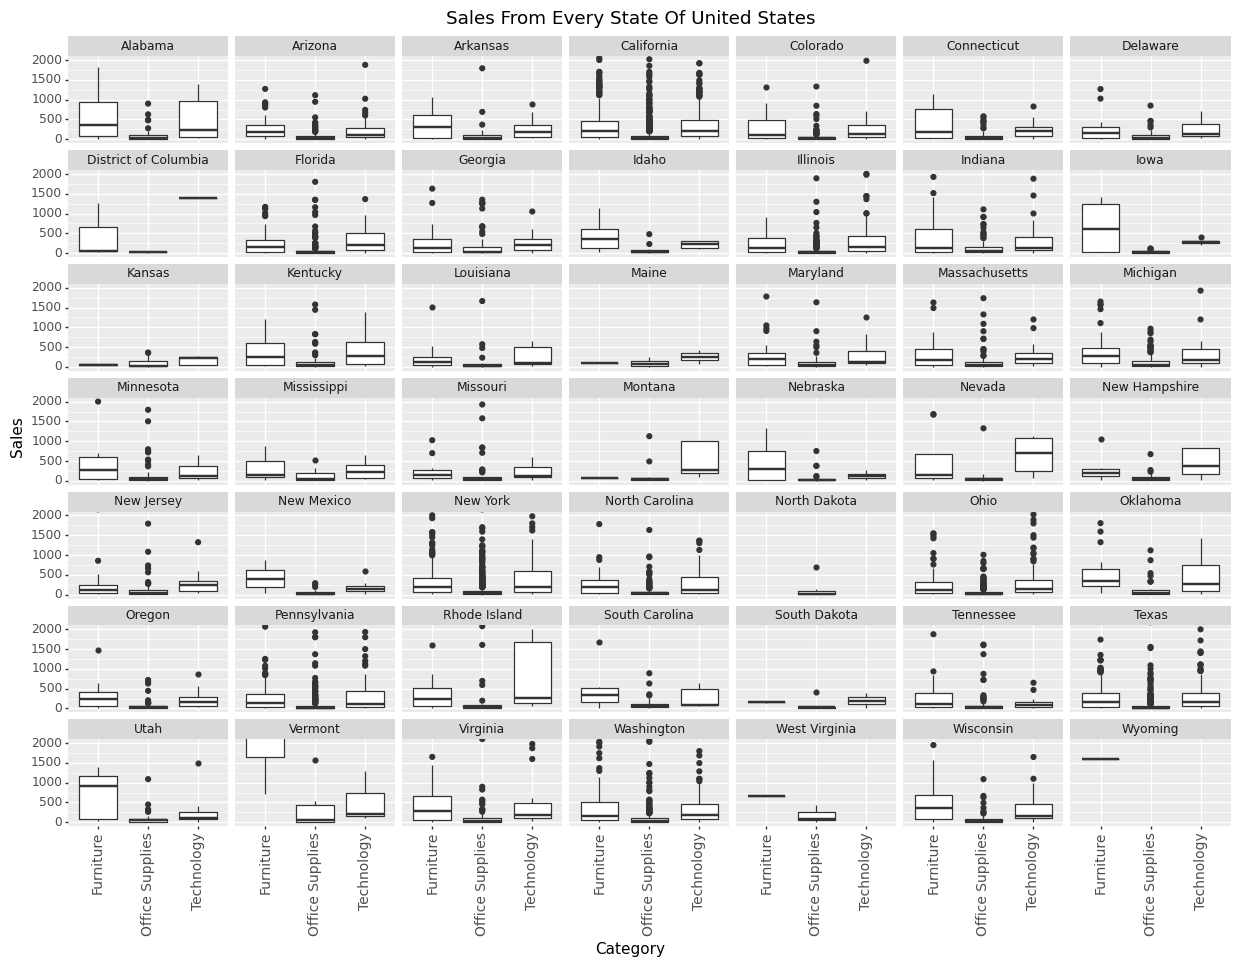

<ggplot: (-9223363243043789852)>

In [33]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(15,10),axis_ticks_length_major=2,axis_ticks_length_minor=2)
(ggplot(data, aes(x='Category', y='Sales')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels + coord_cartesian(ylim = (0, 2000))+ggtitle("Sales From Every State Of United States"))

#The above plot represents the Box plots of the sales of categories "Furniture", "Office Supplies" and "Technology" in each states. 

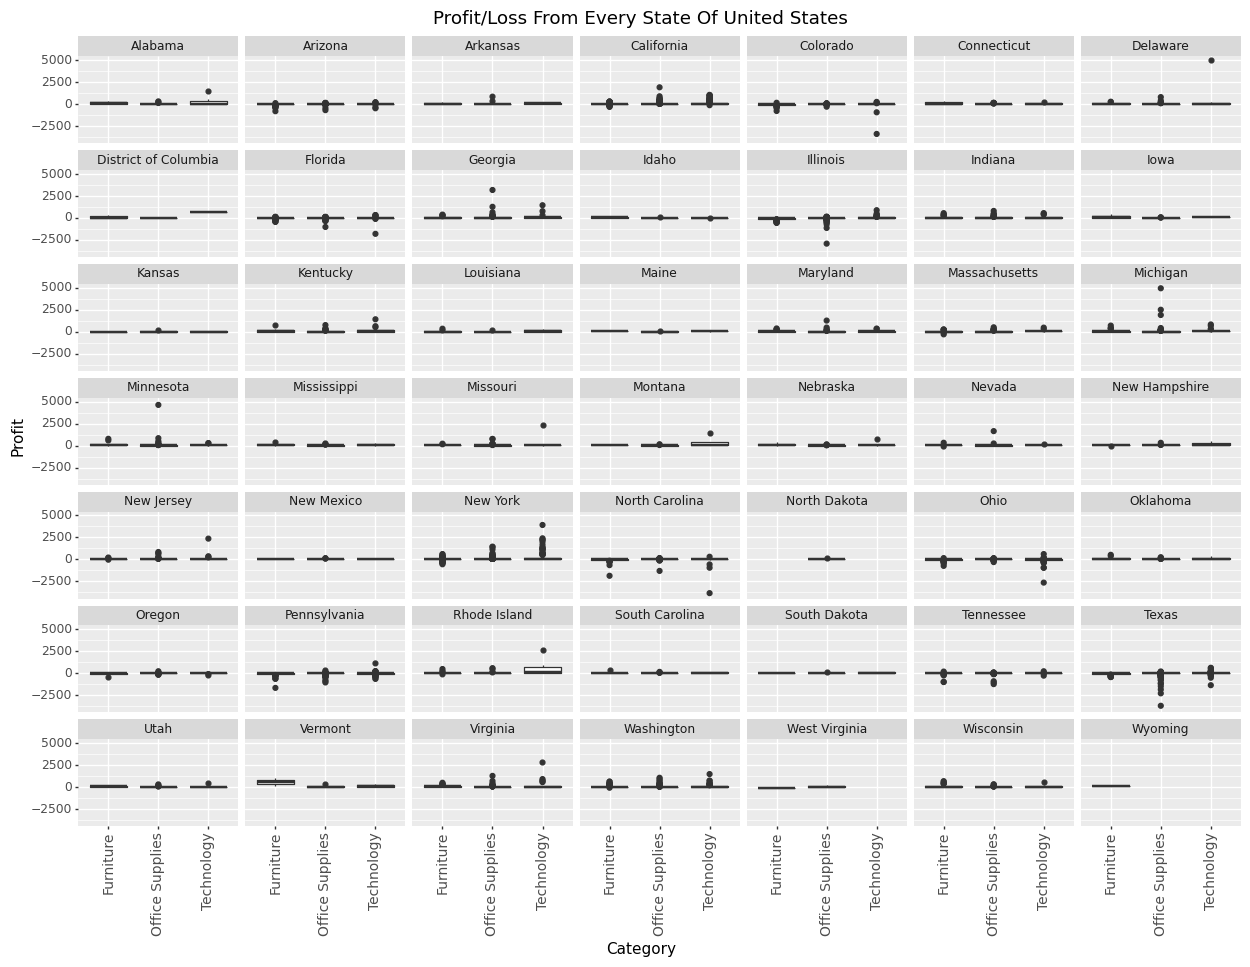

<ggplot: (8793813248106)>

In [34]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(15,10),axis_ticks_length_major=2,axis_ticks_length_minor=2)
(ggplot(data, aes(x='Category', y='Profit')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+coord_cartesian(ylim = (-4000,5000))+ggtitle("Profit/Loss From Every State Of United States"))

#The above plot shows that profit/loss of categories "Furniture", "Office Supplies" and "Technology" in each state of the United States.

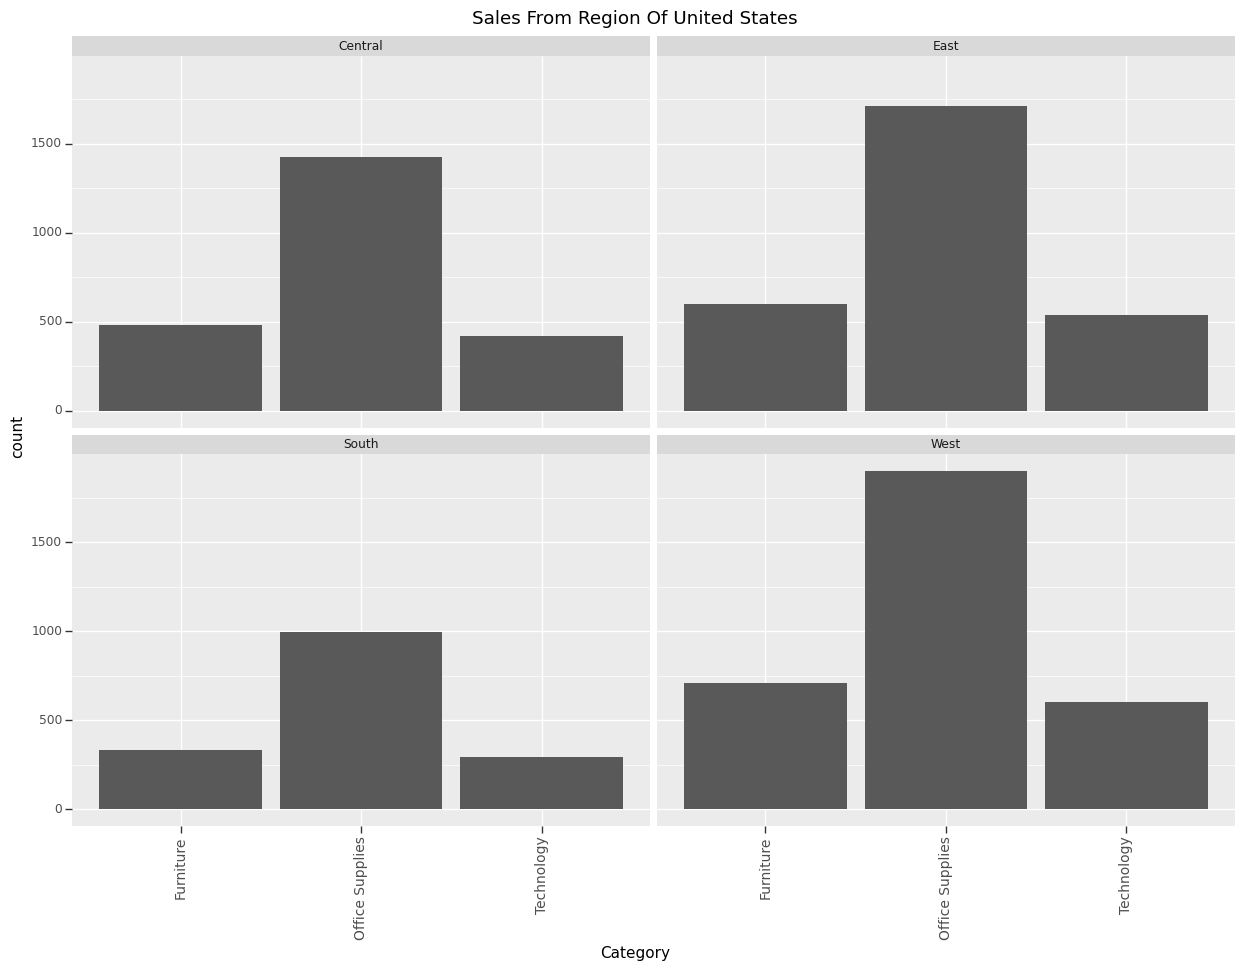

<ggplot: (8793810042863)>

In [42]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(15,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Region Of United States"))

#From the above plots it can be seen that the West of US has maximum sales while the South has least.